# intro

## about dataset

The dataset was created in a project that aims to contribute to the reduction of academic dropout and failure in higher education, by using machine learning techniques to identify students at risk at an early stage of their academic path, so that strategies to support them can be put into place. 

## where to download

<p>you can dwonlad dataset from <a href="https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success">here<a/>.</p>

# understand dataset

## import libraries

In [14]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from imblearn.combine import SMOTETomek
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn import metrics


## read dataset

In [2]:
df = pd.read_csv(filepath_or_buffer="./data.csv", sep=";")
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


## get some info about featuers

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

## get dataset features name

In [4]:
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

## check for null and nan

In [5]:
print('\n\ncheck null:')
print(df.isnull().sum())



check null:
Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                

## rename columns

In [6]:
column_mapping = {
    'Marital status': 'marital_status',
    'Application mode': 'app_mode',
    'Application order': 'app_order',
    'Course': 'course',
    'Daytime/evening attendance\t': 'attendance_type',
    'Previous qualification': 'prev_qualification',
    'Previous qualification (grade)': 'prev_qual_grade',
    'Nacionality': 'nationality',
    "Mother's qualification": 'mother_qual',
    "Father's qualification": 'father_qual',
    "Mother's occupation": 'mother_occupation',
    "Father's occupation": 'father_occupation',
    'Admission grade': 'admission_grade',
    'Displaced': 'is_displaced',
    'Educational special needs': 'has_special_needs',
    'Debtor': 'is_debtor',
    'Tuition fees up to date': 'fees_up_to_date',
    'Gender': 'gender',
    'Scholarship holder': 'has_scholarship',
    'Age at enrollment': 'age_at_enrollment',
    'International': 'is_international',
    'Curricular units 1st sem (credited)': 'sem1_credits',
    'Curricular units 1st sem (enrolled)': 'sem1_enrolled',
    'Curricular units 1st sem (evaluations)': 'sem1_evaluations',
    'Curricular units 1st sem (approved)': 'sem1_approved',
    'Curricular units 1st sem (grade)': 'sem1_grade',
    'Curricular units 1st sem (without evaluations)': 'sem1_without_evals',
    'Curricular units 2nd sem (credited)': 'sem2_credits',
    'Curricular units 2nd sem (enrolled)': 'sem2_enrolled',
    'Curricular units 2nd sem (evaluations)': 'sem2_evaluations',
    'Curricular units 2nd sem (approved)': 'sem2_approved',
    'Curricular units 2nd sem (grade)': 'sem2_grade',
    'Curricular units 2nd sem (without evaluations)': 'sem2_without_evals',
    'Unemployment rate': 'unemployment_rate',
    'Inflation rate': 'inflation_rate',
    'GDP': 'gdp',
    'Target': 'target'
}

df = df.rename(columns=column_mapping)
df.head()

,marital_status,app_mode,app_order,course,attendance_type,prev_qualification,prev_qual_grade,nationality,mother_qual,father_qual,...,sem2_credits,sem2_enrolled,sem2_evaluations,sem2_approved,sem2_grade,sem2_without_evals,unemployment_rate,inflation_rate,gdp,target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


## final analysis

In [7]:
df['mother_qual'].unique()

array([19,  1, 37, 38,  3,  4, 42,  2, 34, 12, 40,  9,  5, 39, 11, 41, 30,
       14, 35, 36,  6, 10, 29, 43, 18, 22, 27, 26, 44])

- ***about dataset***:
    1. we've got 4424 rows with 37 columns
    2. most of columns are categorical but the dataset creator used label encode on them so we still can use some statistic analysis on them
    3. there is no null or NaN field in dataset

- ***about features***:

    - **demographic features**:
        1. *marital_status*: indicates the student's marital status, which may impact time availability and responsibilities.
        2. *gender*: student's gender, which may reveal patterns in educational outcomes across different genders.
        3. *age_at_enrollment*: age when the student enrolled, potentially affecting maturity, preparation, and commitment levels.
        4. *nationality*: student's country of origin, which may relate to cultural background and adaptation challenges.
        5. *is_international*: binary indicator of whether the student is international, related to potential language barriers and adaptation issues.
        6. *is_displaced*: indicates if the student is studying away from their home region, which may affect support systems and adaptation.
        7. *has_special_needs*: identifies students with educational special needs requiring additional support.
        
    - **family background**:
 
        8. *mother_qual*: mother's educational qualification level, an important socioeconomic indicator.
        9. *father_qual*: father's educational qualification level, another key socioeconomic indicator.
        10. *mother_occupation*: mother's professional occupation, reflecting family socioeconomic status.
        11. *father_occupation*: father's professional occupation, also reflecting family socioeconomic status.
        
    - **application and enrollment**:
 
        12. *app_mode*: how the student applied to the program (e.g., standard, special admission).
        13. *app_order*: the order of preference the student gave this course in their application, indicating motivation level.
        14. *course*: the specific program the student is enrolled in.
        15. *attendance_type*: whether the student attends daytime or evening classes, reflecting potential work commitments.
        16. *prev_qualification*: the type of qualification the student had before entering higher education.
        17. *prev_qual_grade*: the grade achieved in their previous qualification, indicating prior academic performance.
        
    - **financial factors**:
 
        18. *is_debtor*: whether the student has outstanding debt to the institution.
        19. *fees_up_to_date*: whether the student's tuition payments are current.
        20. *has_scholarship*: whether the student receives financial aid, indicating financial need and/or academic merit.
        
    - **academic performance (first semester)**:
 
        21. *sem1_credits*: number of course units credited/recognized from previous studies.
        22. *sem1_enrolled*: number of curricular units the student enrolled in.
        23. *sem1_evaluations*: number of evaluations the student participated in.
        24. *sem1_approved*: number of course units the student successfully passed.
        25. *sem1_grade*: average grade across all units in first semester.
        26. *sem1_without_evals*: number of units where the student didn't participate in evaluations.
        
    - **academic performance (second semester)**:
 
        27. *sem2_credits*: number of course units credited from previous studies.
        28. *sem2_enrolled*: number of curricular units the student enrolled in.
        29. *sem2_evaluations*: number of evaluations the student participated in.
        30. *sem2_approved*: number of course units the student successfully passed.
        31. *sem2_grade*: average grade across all units in second semester.
        32. *sem2_without_evals*: number of units where the student didn't participate in evaluations.
        
    - **economic context**:
 
        33. *unemployment_rate*: national unemployment rate when the student was enrolled, reflecting job market conditions.
        34. *inflation_rate*: inflation rate when the student was enrolled, indicating economic stability.
        35. *gdp*: gross domestic product when the student was enrolled, reflecting overall economic health.
        
    - **target variable**:
 
        36. *target*: the outcome variable indicating whether the student dropped out, graduated, or is still enrolled.

# statistic analysing

## describe whole dataset

In [88]:
des_result = df.describe().T
des_result.to_csv('describe_mat.csv', float_format='%.2f')

pd.DataFrame(des_result)

,count,mean,std,min,25%,50%,75%,max
marital_status,4424.0,1.178571,0.605747,1.00,1.00,1.000000,1.000000,6.000000
app_mode,4424.0,18.669078,17.484682,1.00,1.00,17.000000,39.000000,57.000000
app_order,4424.0,1.727848,1.313793,0.00,1.00,1.000000,2.000000,9.000000
course,4424.0,8856.642631,2063.566416,33.00,9085.00,9238.000000,9556.000000,9991.000000
attendance_type,4424.0,0.890823,0.311897,0.00,1.00,1.000000,1.000000,1.000000
prev_qualification,4424.0,4.577758,10.216592,1.00,1.00,1.000000,1.000000,43.000000
prev_qual_grade,4424.0,132.613314,13.188332,95.00,125.00,133.100000,140.000000,190.000000
nationality,4424.0,1.873192,6.914514,1.00,1.00,1.000000,1.000000,109.000000
mother_qual,4424.0,19.561935,15.603186,1.00,2.00,19.000000,37.000000,44.000000
father_qual,4424.0,22.275316,15.343108,1.00,3.00,19.000000,37.000000,44.000000


### final analysis

- feature analysis:
    - **marital_status**: average marital_status is around 1.18 with standard deviation of 0.61. The minimum is 1, all quartiles (25%, 50%, 75%) are at 1, but the maximum value is 6. This suggests most students have the same marital status (likely single), with few exceptions.
    
    - **app_mode**: average application mode is around 18.67 with standard deviation of 17.48. Values range from 1 to 57, with quartiles at 1, 17, and 39, indicating several different application methods with uneven distribution.
    
    - **app_order**: average application order is 1.73 with standard deviation of 1.31. Values range from 0 to 9, with quartiles at 1, 1, and 2, suggesting most students listed this program as their first or second choice.
    
    - **course**: average course code is 8856.64 with standard deviation of 2063.57. Values range from 33 to 9991, with quartiles at 9085, 9238, and 9556, showing a wide range of course codes.
    
    - **attendance_type**: average is 0.89 with standard deviation of 0.31. Values are 0 or 1, with most quartiles at 1, indicating most students have the same attendance type (likely daytime).
    
    - **prev_qualification**: average is 4.58 with standard deviation of 10.22. Values range from 1 to 43, with quartiles at 1, 1, and 1, suggesting most students have the same qualification type.
    
    - **prev_qual_grade**: average grade is 132.61 with standard deviation of 13.19. Values range from 95 to 190, with quartiles at 125, 133.1, and 140, showing a relatively normal distribution of previous grades.
    
    - **nationality**: average is 1.87 with standard deviation of 6.91. Values range from 1 to 109, with all quartiles at 1, indicating most students share the same nationality.
    
    - **mother_qual** and **father_qual**: averages around 19-22 with standard deviations of ~15. Values range from 1 to 44, with varied quartiles, showing diverse parental education levels.
    
    - **mother_occupation** and **father_occupation**: averages around 11 with standard deviations of ~25-26. Values range from 0 to 195, with quartiles showing most parents have lower occupation codes.
    
    - **admission_grade**: average is 126.98 with standard deviation of 14.48. Values range from 95 to 190, with quartiles at 117.9, 126.1, and 134.8, showing a normal distribution of admission scores.
    
    - **is_displaced**: average is 0.55 with standard deviation of 0.50. Binary values (0,1) with nearly even distribution, indicating about half the students are displaced.
    
    - **has_special_needs**: average is 0.01 with standard deviation of 0.11. Binary values with all quartiles at 0, showing very few students have special needs.
    
    - **is_debtor**: average is 0.11 with standard deviation of 0.32. Binary values with all quartiles at 0, indicating few students are debtors.
    
    - **fees_up_to_date**: average is 0.88 with standard deviation of 0.32. Binary values with most quartiles at 1, showing most students have paid their fees.
    
    - **gender**: average is 0.35 with standard deviation of 0.48. Binary values with lower quartiles at 0 and upper at 1, suggesting more students of one gender than the other.
    
    - **has_scholarship**: average is 0.25 with standard deviation of 0.43. Binary values with all quartiles at 0, indicating minority of students have scholarships.
    
    - **age_at_enrollment**: average is 23.27 with standard deviation of 7.59. Values range from 17 to 70, with quartiles at 19, 20, and 25, showing most students are young adults.
    
    - **is_international**: average is 0.02 with standard deviation of 0.16. Binary values with all quartiles at 0, showing very few international students.
    
    - **sem1_** and **sem2_** metrics: These show academic performance across two semesters, with similar patterns. Credits, enrollments, evaluations, approvals and grades show typical academic distributions.
    
    - **unemployment_rate**: average is 11.57% with standard deviation of 2.66%. Values range from 7.6% to 16.2%, with quartiles at 9.4%, 11.1%, and 13.9%.
    
    - **inflation_rate**: average is 1.23% with standard deviation of 1.38%. Values range from -0.8% to 3.7%, with quartiles at 0.3%, 1.4%, and 2.6%.
    
    - **gdp**: average is near 0 with standard deviation of 2.27. Values range from -4.06 to 3.51, with quartiles at -1.7, 0.32, and 1.79, likely representing GDP growth rates.

## analysing numerical features

### get numerical features

In [10]:
df_num = df.select_dtypes(include="float64")
df_num

,prev_qual_grade,admission_grade,sem1_grade,sem2_grade,unemployment_rate,inflation_rate,gdp
0,122.0,127.3,0.000000,0.000000,10.8,1.4,1.74
1,160.0,142.5,14.000000,13.666667,13.9,-0.3,0.79
2,122.0,124.8,0.000000,0.000000,10.8,1.4,1.74
3,122.0,119.6,13.428571,12.400000,9.4,-0.8,-3.12
4,100.0,141.5,12.333333,13.000000,13.9,-0.3,0.79
...,...,...,...,...,...,...,...
4419,125.0,122.2,13.600000,12.666667,15.5,2.8,-4.06
4420,120.0,119.0,12.000000,11.000000,11.1,0.6,2.02
4421,154.0,149.5,14.912500,13.500000,13.9,-0.3,0.79
4422,180.0,153.8,13.800000,12.000000,9.4,-0.8,-3.12


### plot numerical features

<Figure size 500x500 with 0 Axes>

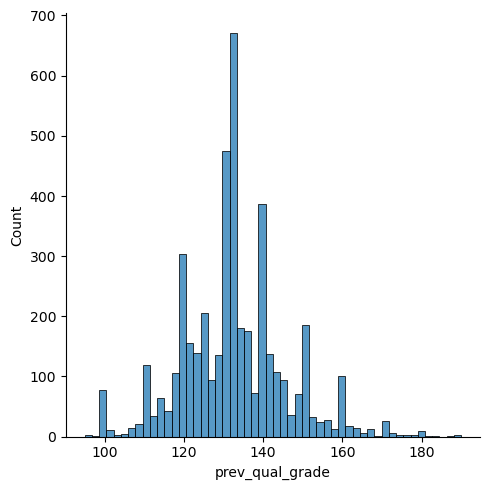

<Figure size 500x500 with 0 Axes>

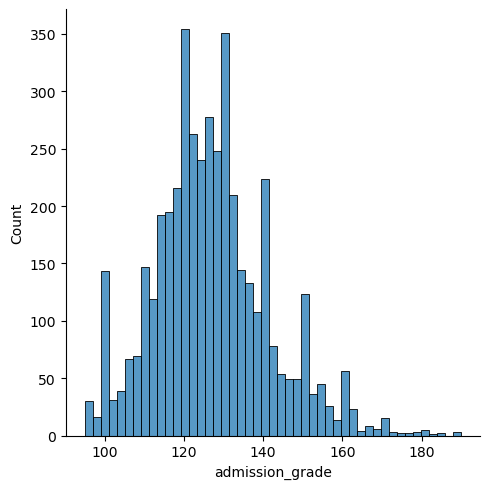

<Figure size 500x500 with 0 Axes>

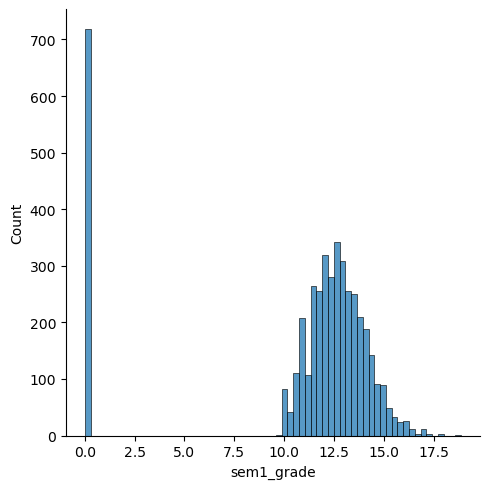

<Figure size 500x500 with 0 Axes>

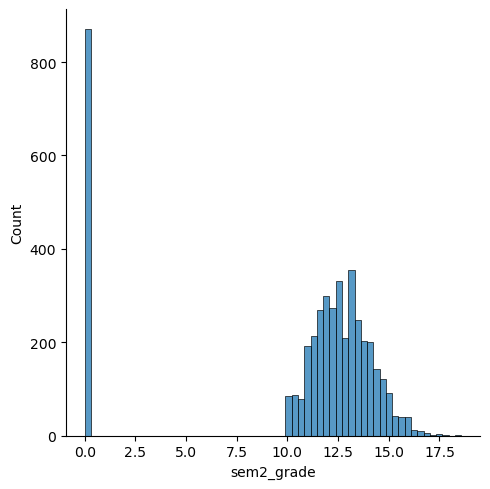

<Figure size 500x500 with 0 Axes>

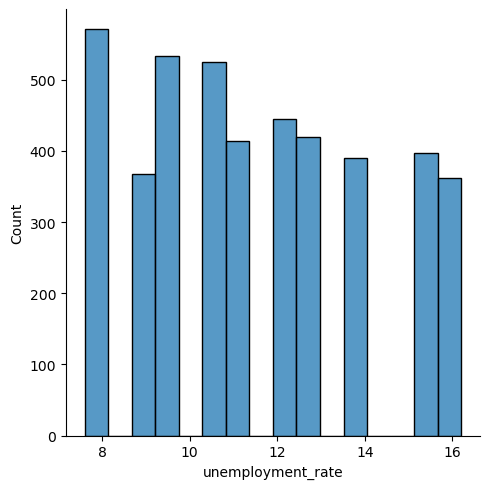

<Figure size 500x500 with 0 Axes>

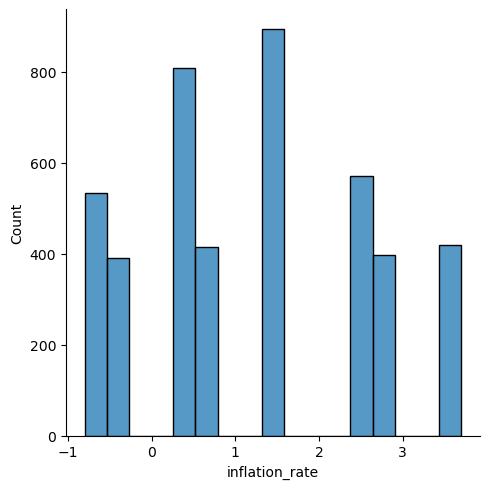

<Figure size 500x500 with 0 Axes>

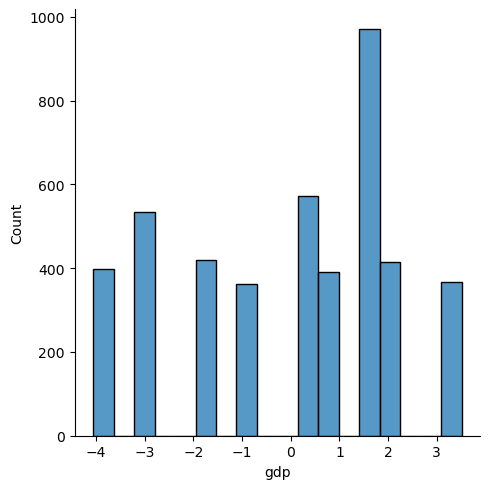

In [45]:
for f in df_num:
    plt.figure(figsize=(5, 5))
    sns.displot(df_num[f])
    plt.show()

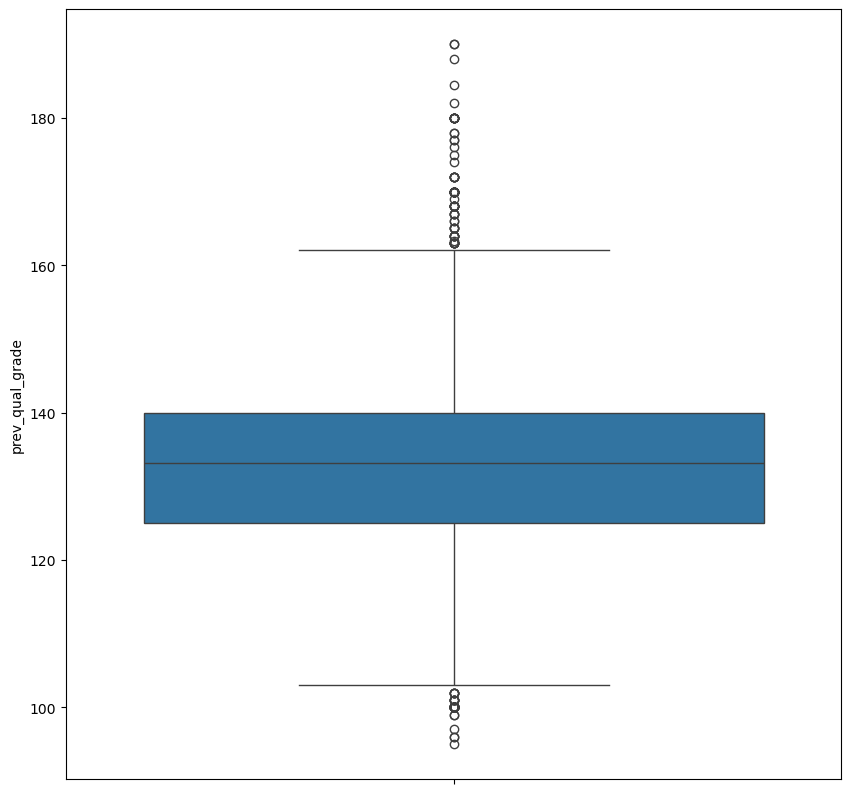

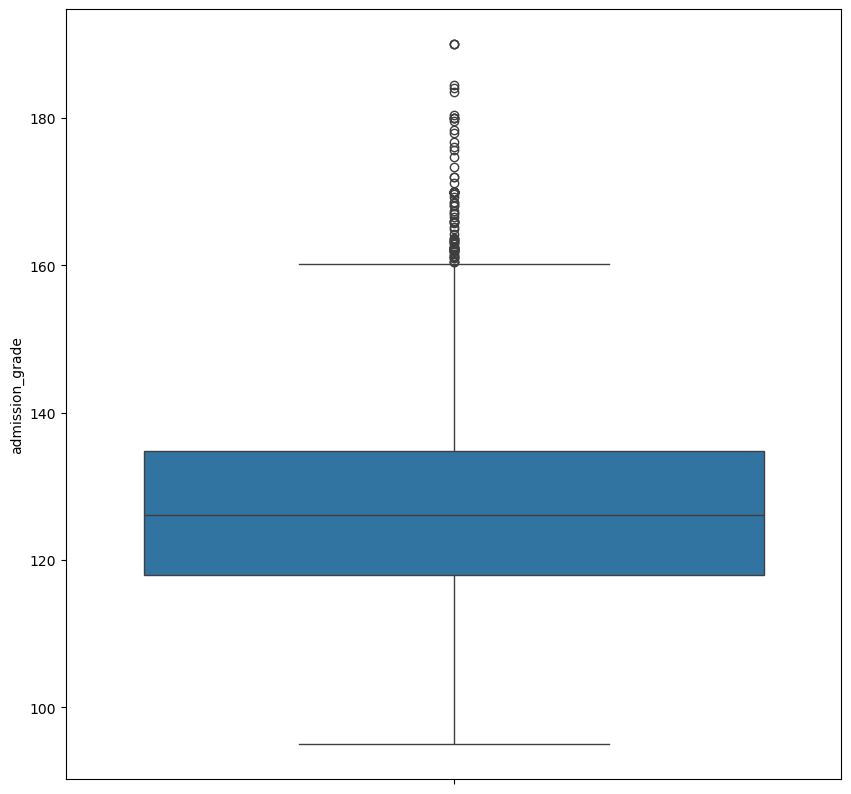

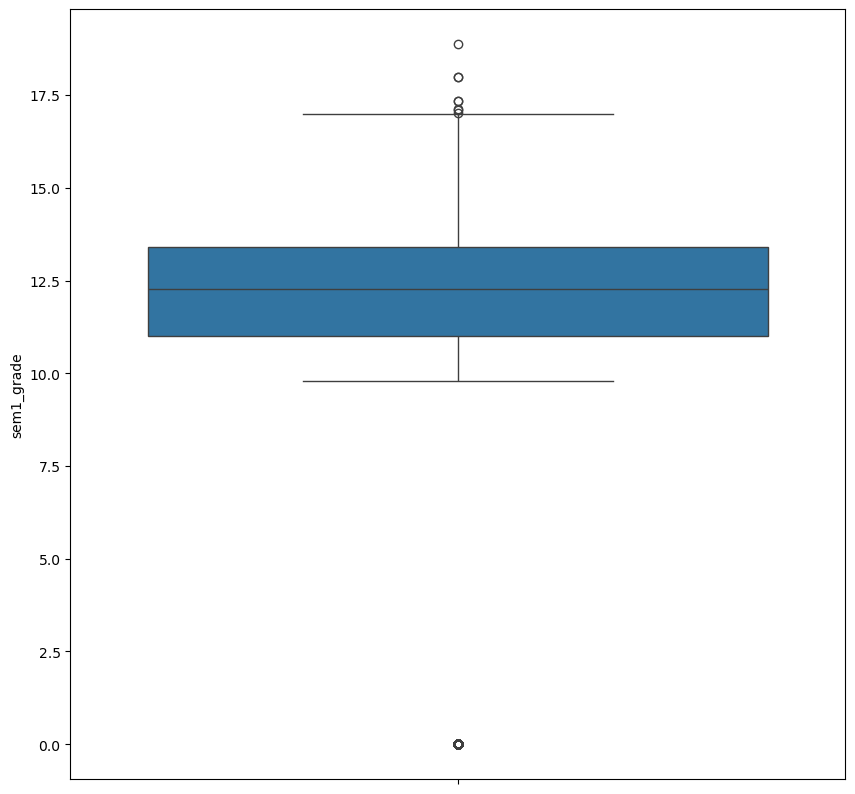

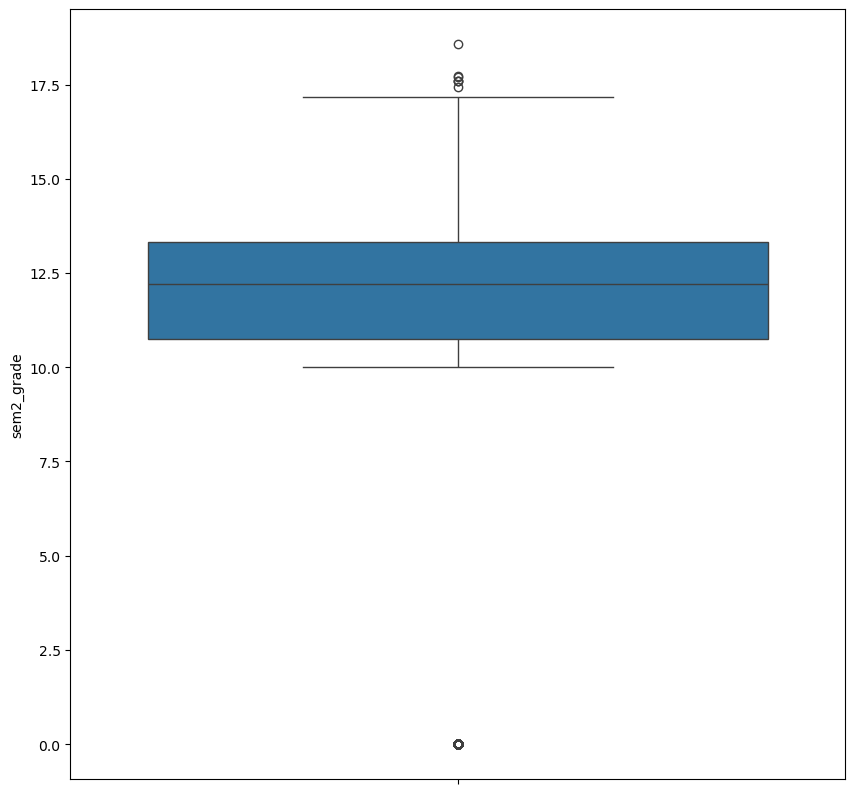

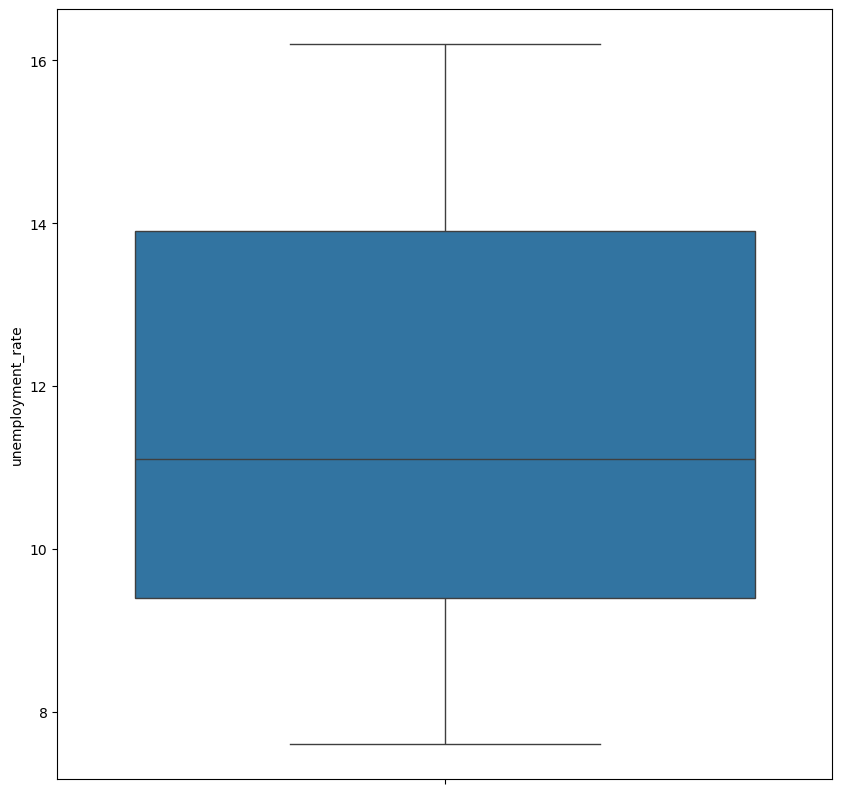

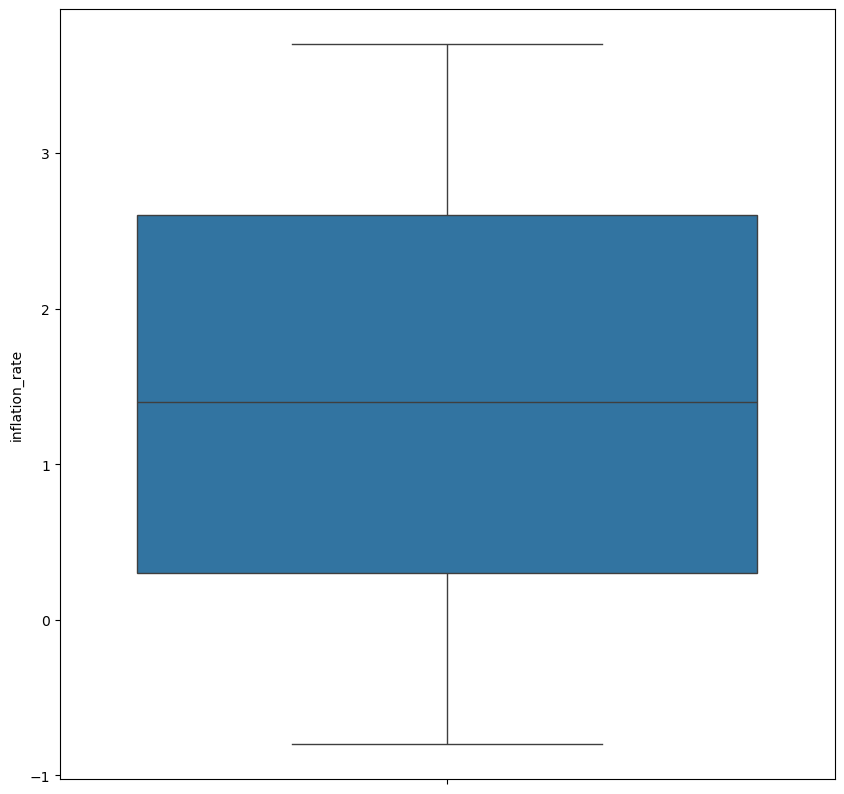

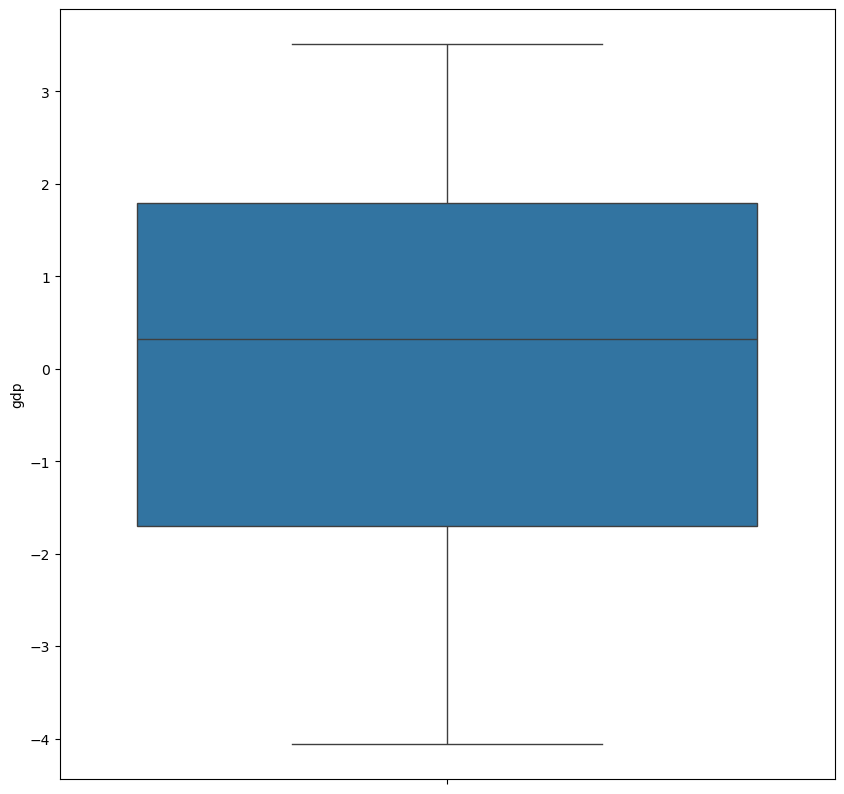

In [33]:
for f in df_num:
    plt.figure(figsize=(10, 10))
    sns.boxplot(df_num[f])
    plt.show()

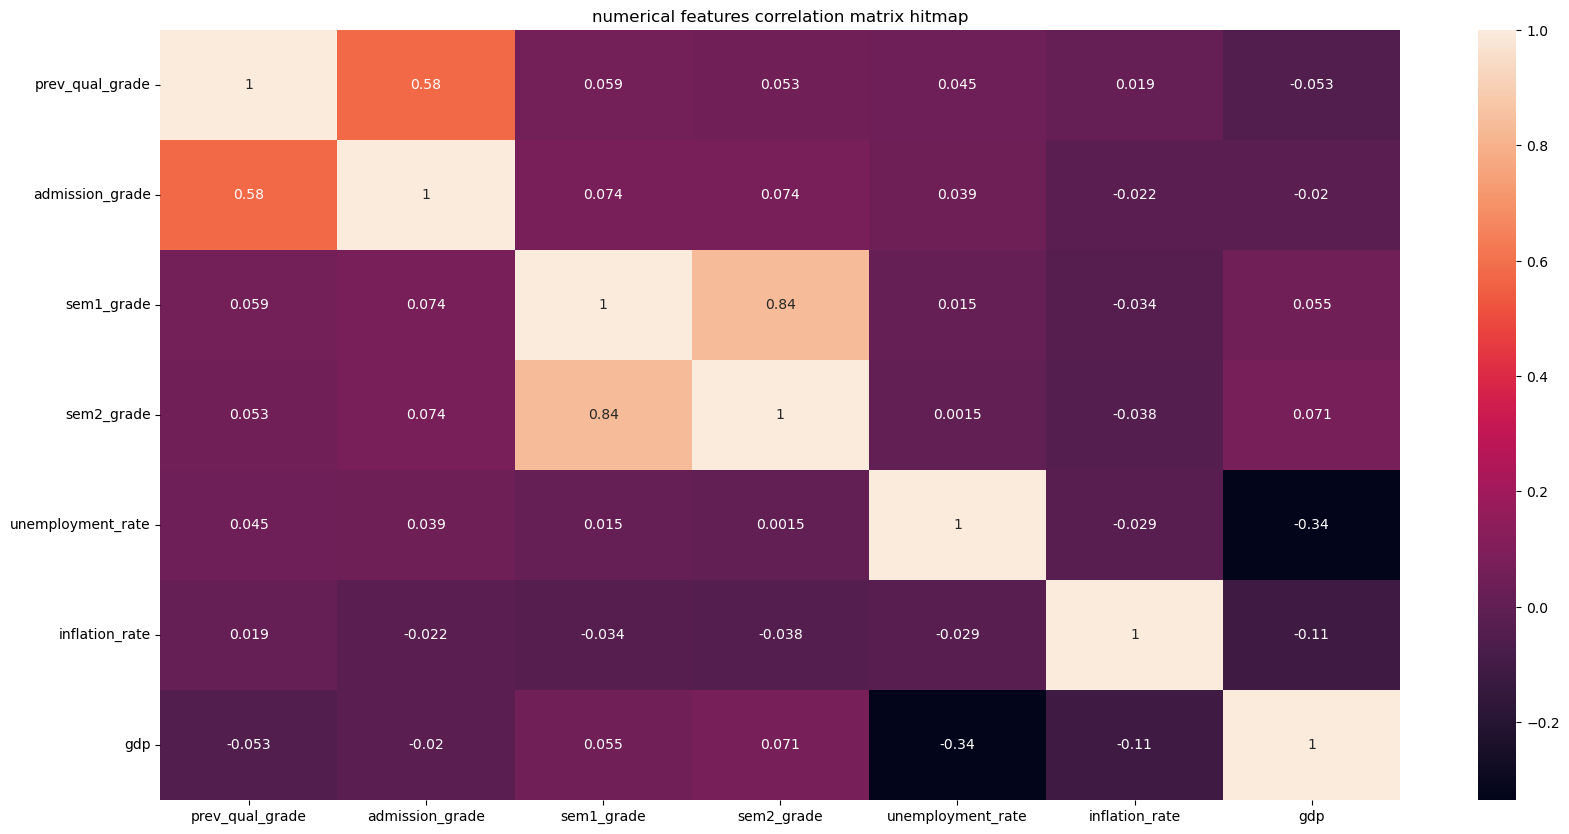

In [30]:
num_correlation = df_num.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(num_correlation, annot=True)
plt.title('numerical features correlation matrix hitmap')
plt.show()

### result

except Unemployment rate, Inflation rate, and GDP all numerical features have outlier datas.
<br /><br />
we've got strong correlation between:
<br />
- *sem2_grade* and *sem1_grade*.
<br />

we've got average correlation between:
<br />
- *admission_grade* and *prev_qual_grade*.
<br />

we've got zero and negative correlation between others
<br />

## analysing categorical features

In [49]:
df_cat = df.select_dtypes(exclude='float64')
df_cat = df_cat.drop(columns="target")
df_cat.head(n=3)

,marital_status,app_mode,app_order,course,attendance_type,prev_qualification,nationality,mother_qual,father_qual,mother_occupation,...,sem1_credits,sem1_enrolled,sem1_evaluations,sem1_approved,sem1_without_evals,sem2_credits,sem2_enrolled,sem2_evaluations,sem2_approved,sem2_without_evals
0,1,17,5,171,1,1,1,19,12,5,...,0,0,0,0,0,0,0,0,0,0
1,1,15,1,9254,1,1,1,1,3,3,...,0,6,6,6,0,0,6,6,6,0
2,1,1,5,9070,1,1,1,37,37,9,...,0,6,0,0,0,0,6,0,0,0


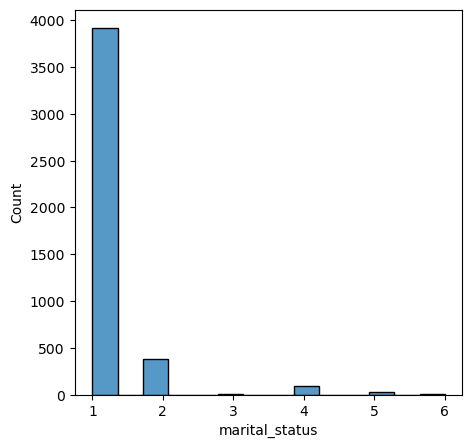

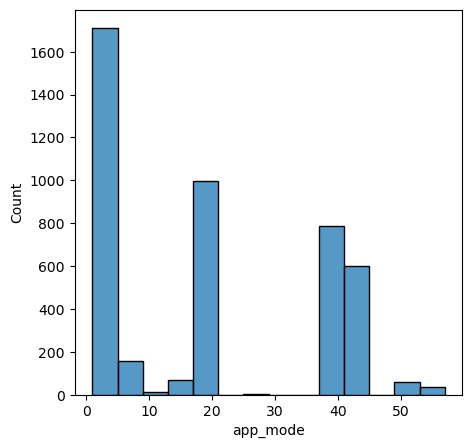

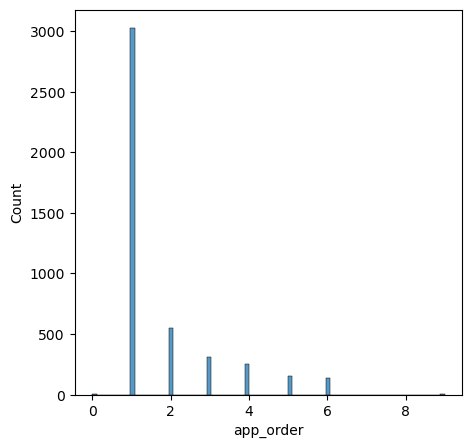

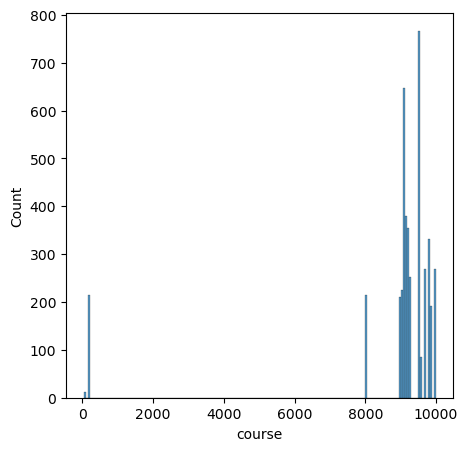

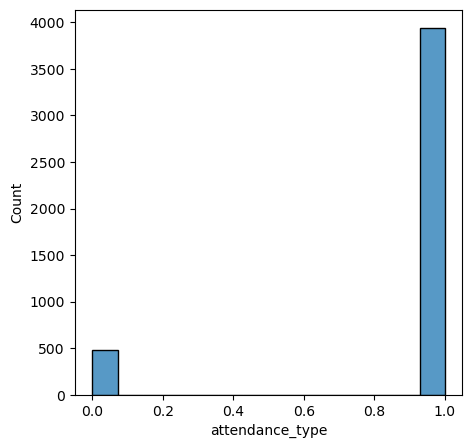

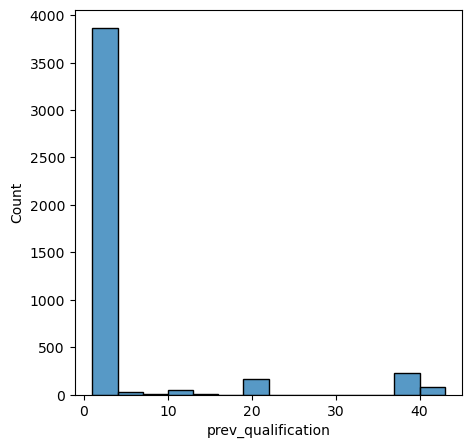

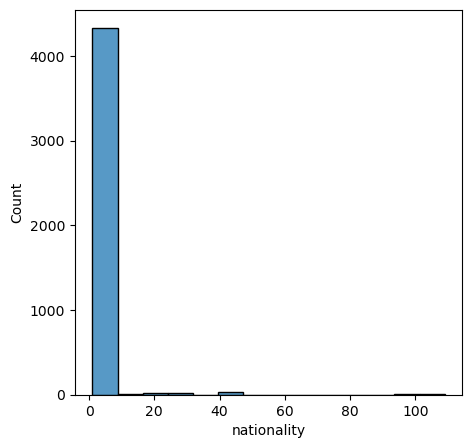

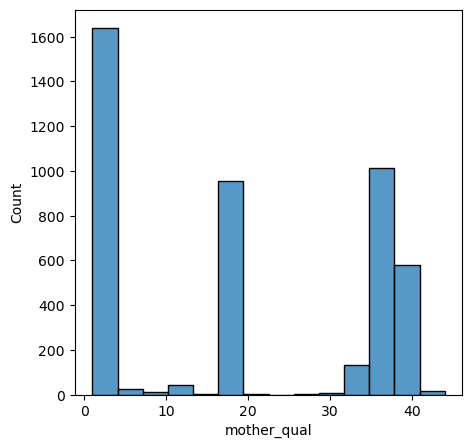

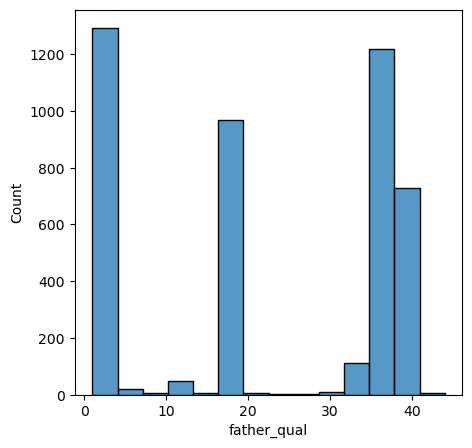

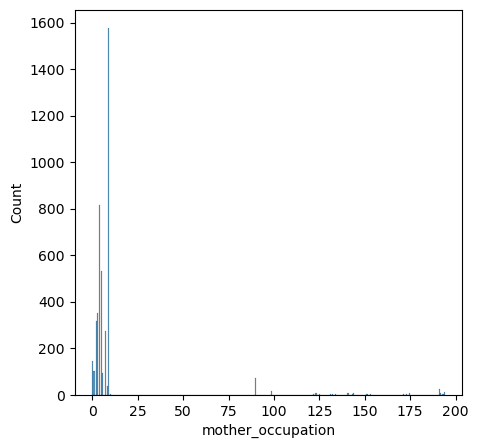

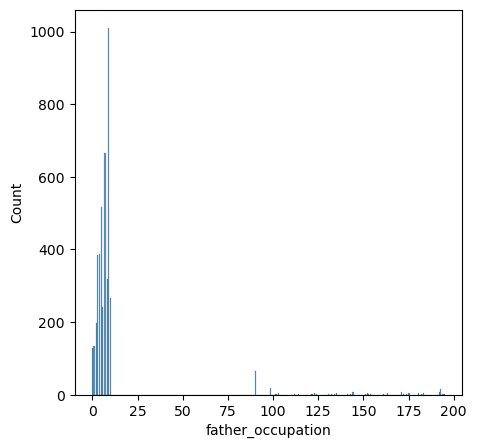

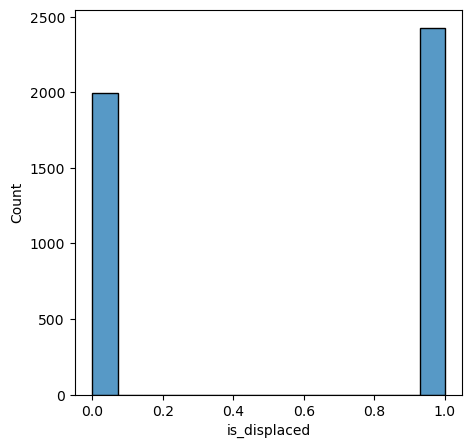

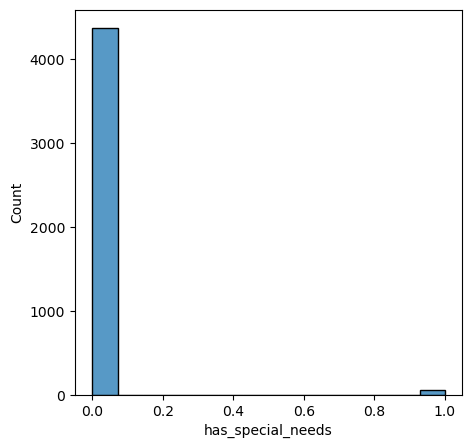

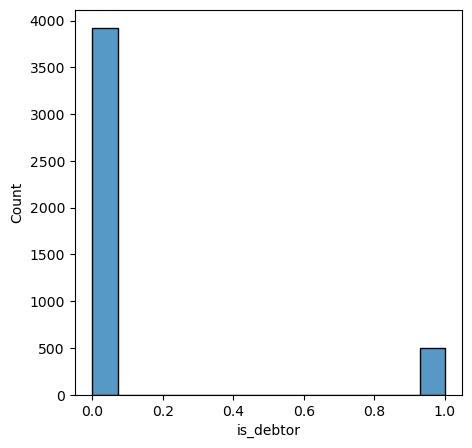

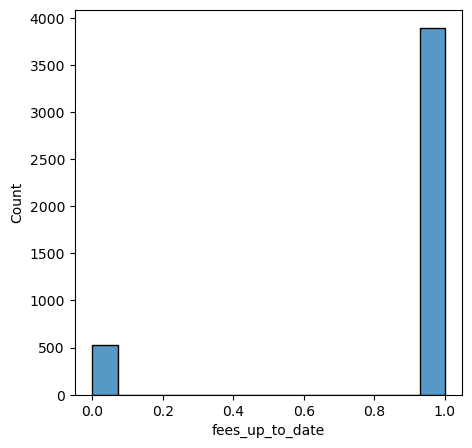

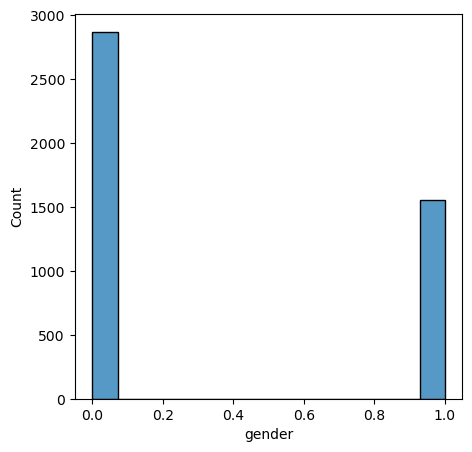

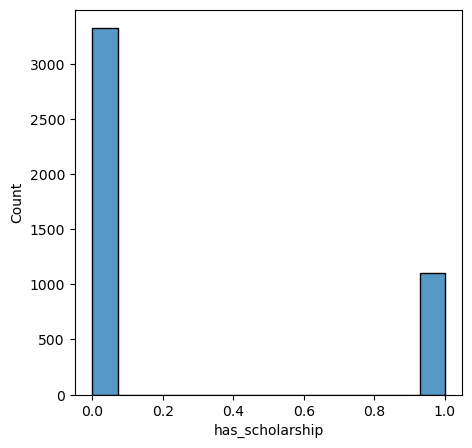

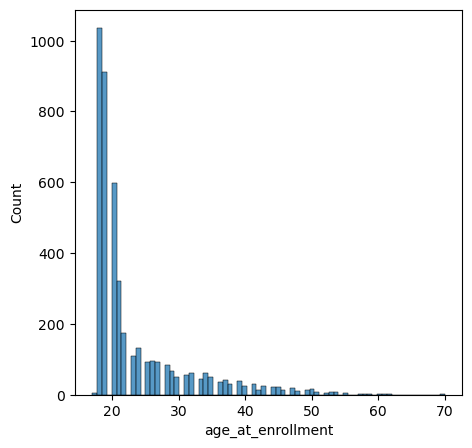

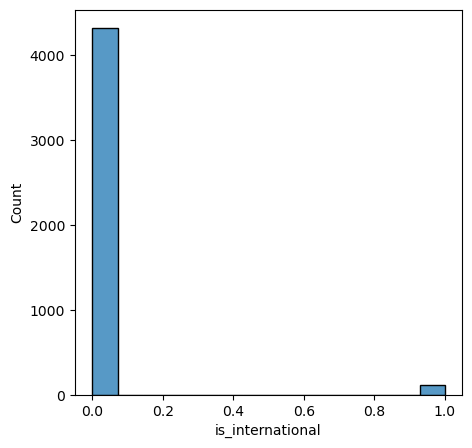

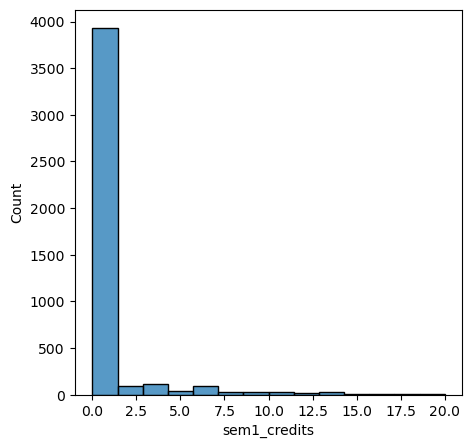

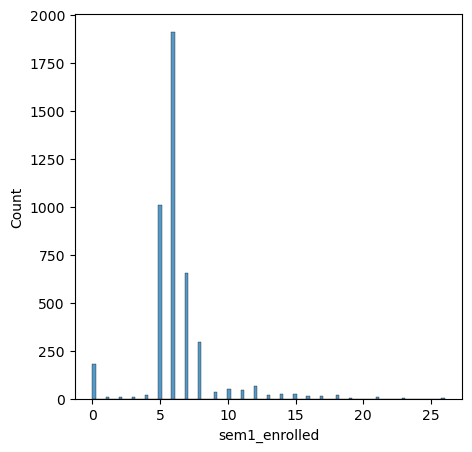

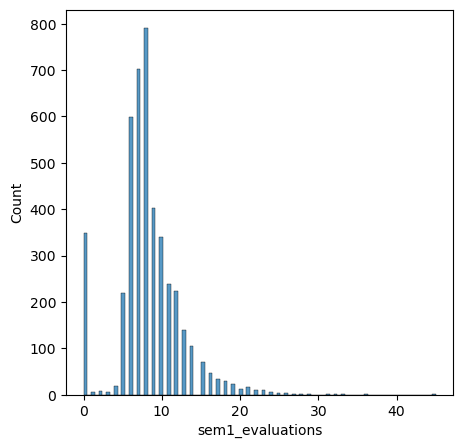

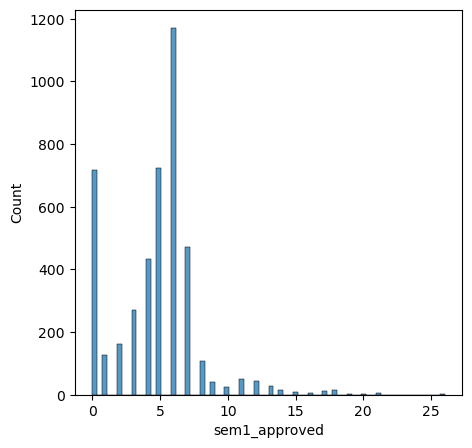

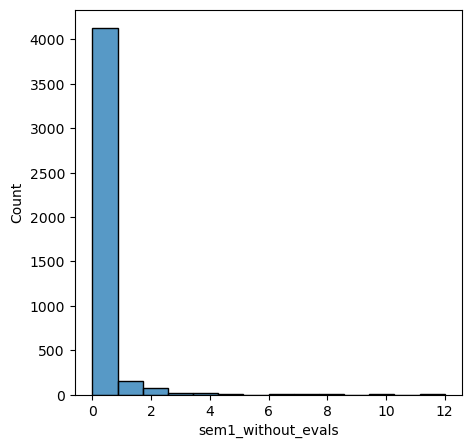

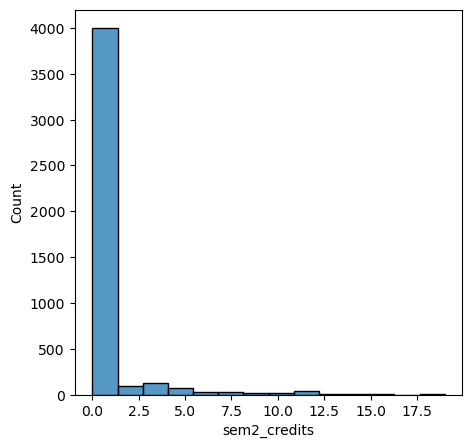

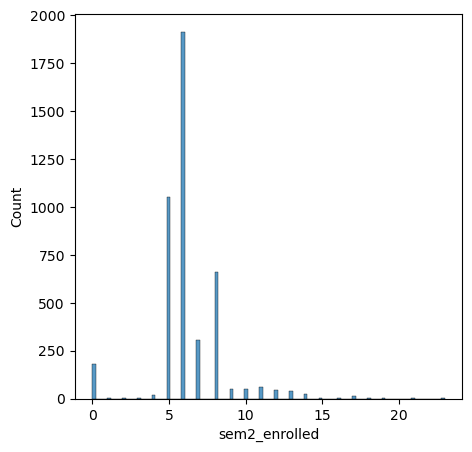

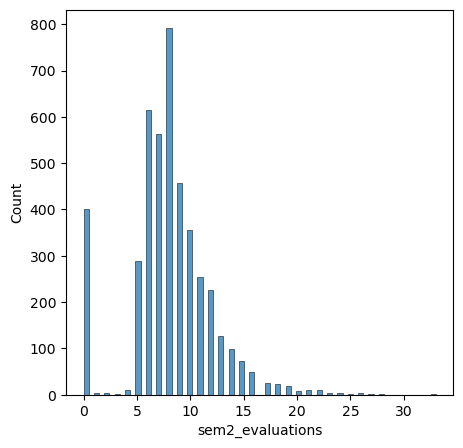

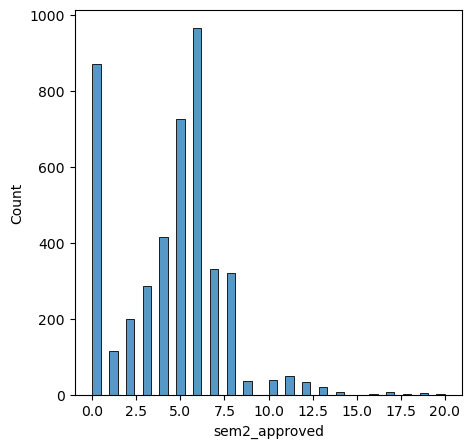

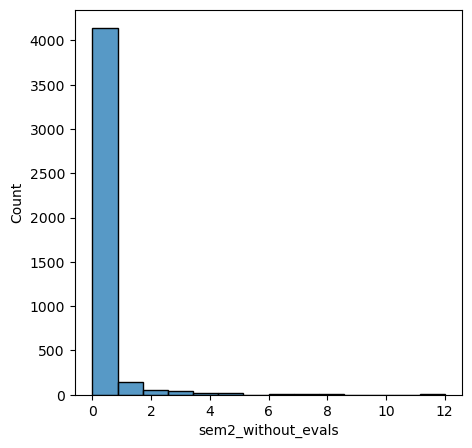

In [46]:
for i in df_cat:
    plt.figure(figsize=(5, 5))
    sns.histplot(data=df[i])
    plt.show()

- most of students are single (in marital_status 1 is single, 2 is married).
- in this dataset most of students are followed the 1st phase of application mode.
- most of students have cource 'Nursing' then 'management' and 'social service'.
- most students are comming in day time.